In [169]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from pylab import rcParams

save_figures_to_latex = True
figures_path = '/Exercise_2/latex_ex_2/figures'     # to change if notebook is used in future exercises
HPC_path = '/home/tellocam/Projects/HPC'            # to change if work on another computer is done

##### Figure Settings

In [170]:
rcParams['figure.figsize'] = 8, 5
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 1000

#### Data Path's

In [171]:
path_txt_1 = HPC_path + '/Exercise_2/hydra_env/hydra_output_folders/hydra_Ex1_output/'
path_txt_2 = HPC_path + '/Exercise_2/hydra_env/hydra_output_folders/hydra_Ex2_output/'
path_txt_3 = HPC_path + '/Exercise_2/hydra_env/hydra_output_folders/hydra_Ex3_output/'
path_txt_4 = HPC_path + '/Exercise_2/hydra_env/hydra_output_folders/hydra_Ex4_output/'
path_txt_5 = HPC_path + '/Exercise_2/hydra_env/hydra_output_folders/hydra_Ex5_output/'
txt_files_1, txt_files_2 = glob.glob(path_txt_1 + "EX1_*.txt"), glob.glob(path_txt_2 + "EX2_*.txt")
txt_files_3, txt_files_4 = glob.glob(path_txt_3 + "EX3_*.txt"), glob.glob(path_txt_4 + "EX4_*.txt")
txt_files_5 = glob.glob(path_txt_5 + "EX5_*.txt")
df_dict_1, df_dict_2, df_dict_3, df_dict_4, df_dict_5 =  {}, {}, {}, {}, {}

#### Data Prep:     A Gazillion .txt files   $\longrightarrow$  a dictionary of pandas dataframes

In [172]:
for file in txt_files_1:
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file, sep=',', header=None)
        df.rename(columns={0:"Count", 1:"Bytes", 2:"Average", 3:"Min", 4:"Median", 5:"Stddev", 6:"CI"}, inplace=True)
        df_dict_1[file] = df

for file in txt_files_2:
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file, sep=',', header=None)
        df.rename(columns={0:"Count", 1:"Bytes", 2:"Average", 3:"Min", 4:"Median", 5:"Stddev", 6:"CI"}, inplace=True)
        df_dict_2[file] = df

for file in txt_files_3:
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file, sep=',', header=None)
        df.rename(columns={0:"Count", 1:"Bytes", 2:"Average", 3:"Min", 4:"Median", 5:"Stddev", 6:"CI"}, inplace=True)
        df_dict_3[file] = df

for file in txt_files_4:
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file, sep=',', header=None)
        df.rename(columns={0:"Count", 1:"Bytes", 2:"Average", 3:"Min", 4:"Median", 5:"Stddev", 6:"CI"}, inplace=True)
        df_dict_4[file] = df

for file in txt_files_5:
    if os.stat(file).st_size != 0:
        df = pd.read_csv(file, sep=',', header=None)
        df.rename(columns={0:"Count", 1:"Bytes", 2:"Average", 3:"Min", 4:"Median", 5:"Stddev", 6:"CI"}, inplace=True)
        df_dict_5[file] = df

legend_dict_1, legend_dict_2, legend_dict_3  = df_dict_1.copy(), df_dict_2.copy(), df_dict_3.copy()
legend_dict_4, legend_dict_5 = df_dict_4.copy(), df_dict_5.copy()

for key in legend_dict_1:
    legend_dict_1[key] = key
    legend_dict_1[key] = legend_dict_1[key].replace(path_txt_1, '').replace('.txt', '').replace('_', ' ')

for key in legend_dict_2:
    legend_dict_2[key] = key
    legend_dict_2[key] = legend_dict_2[key].replace(path_txt_2, '').replace('.txt', '').replace('_', ' ')

for key in legend_dict_3:
    legend_dict_3[key] = key
    legend_dict_3[key] = legend_dict_3[key].replace(path_txt_3, '').replace('.txt', '').replace('_', ' ')

for key in legend_dict_4:
    legend_dict_4[key] = key
    legend_dict_4[key] = legend_dict_4[key].replace(path_txt_3, '').replace('.txt', '').replace('_', ' ')

for key in legend_dict_5:
    legend_dict_5[key] = key
    legend_dict_5[key] = legend_dict_5[key].replace(path_txt_5, '').replace('.txt', '').replace('_', ' ')


# Plots For Exercise 1

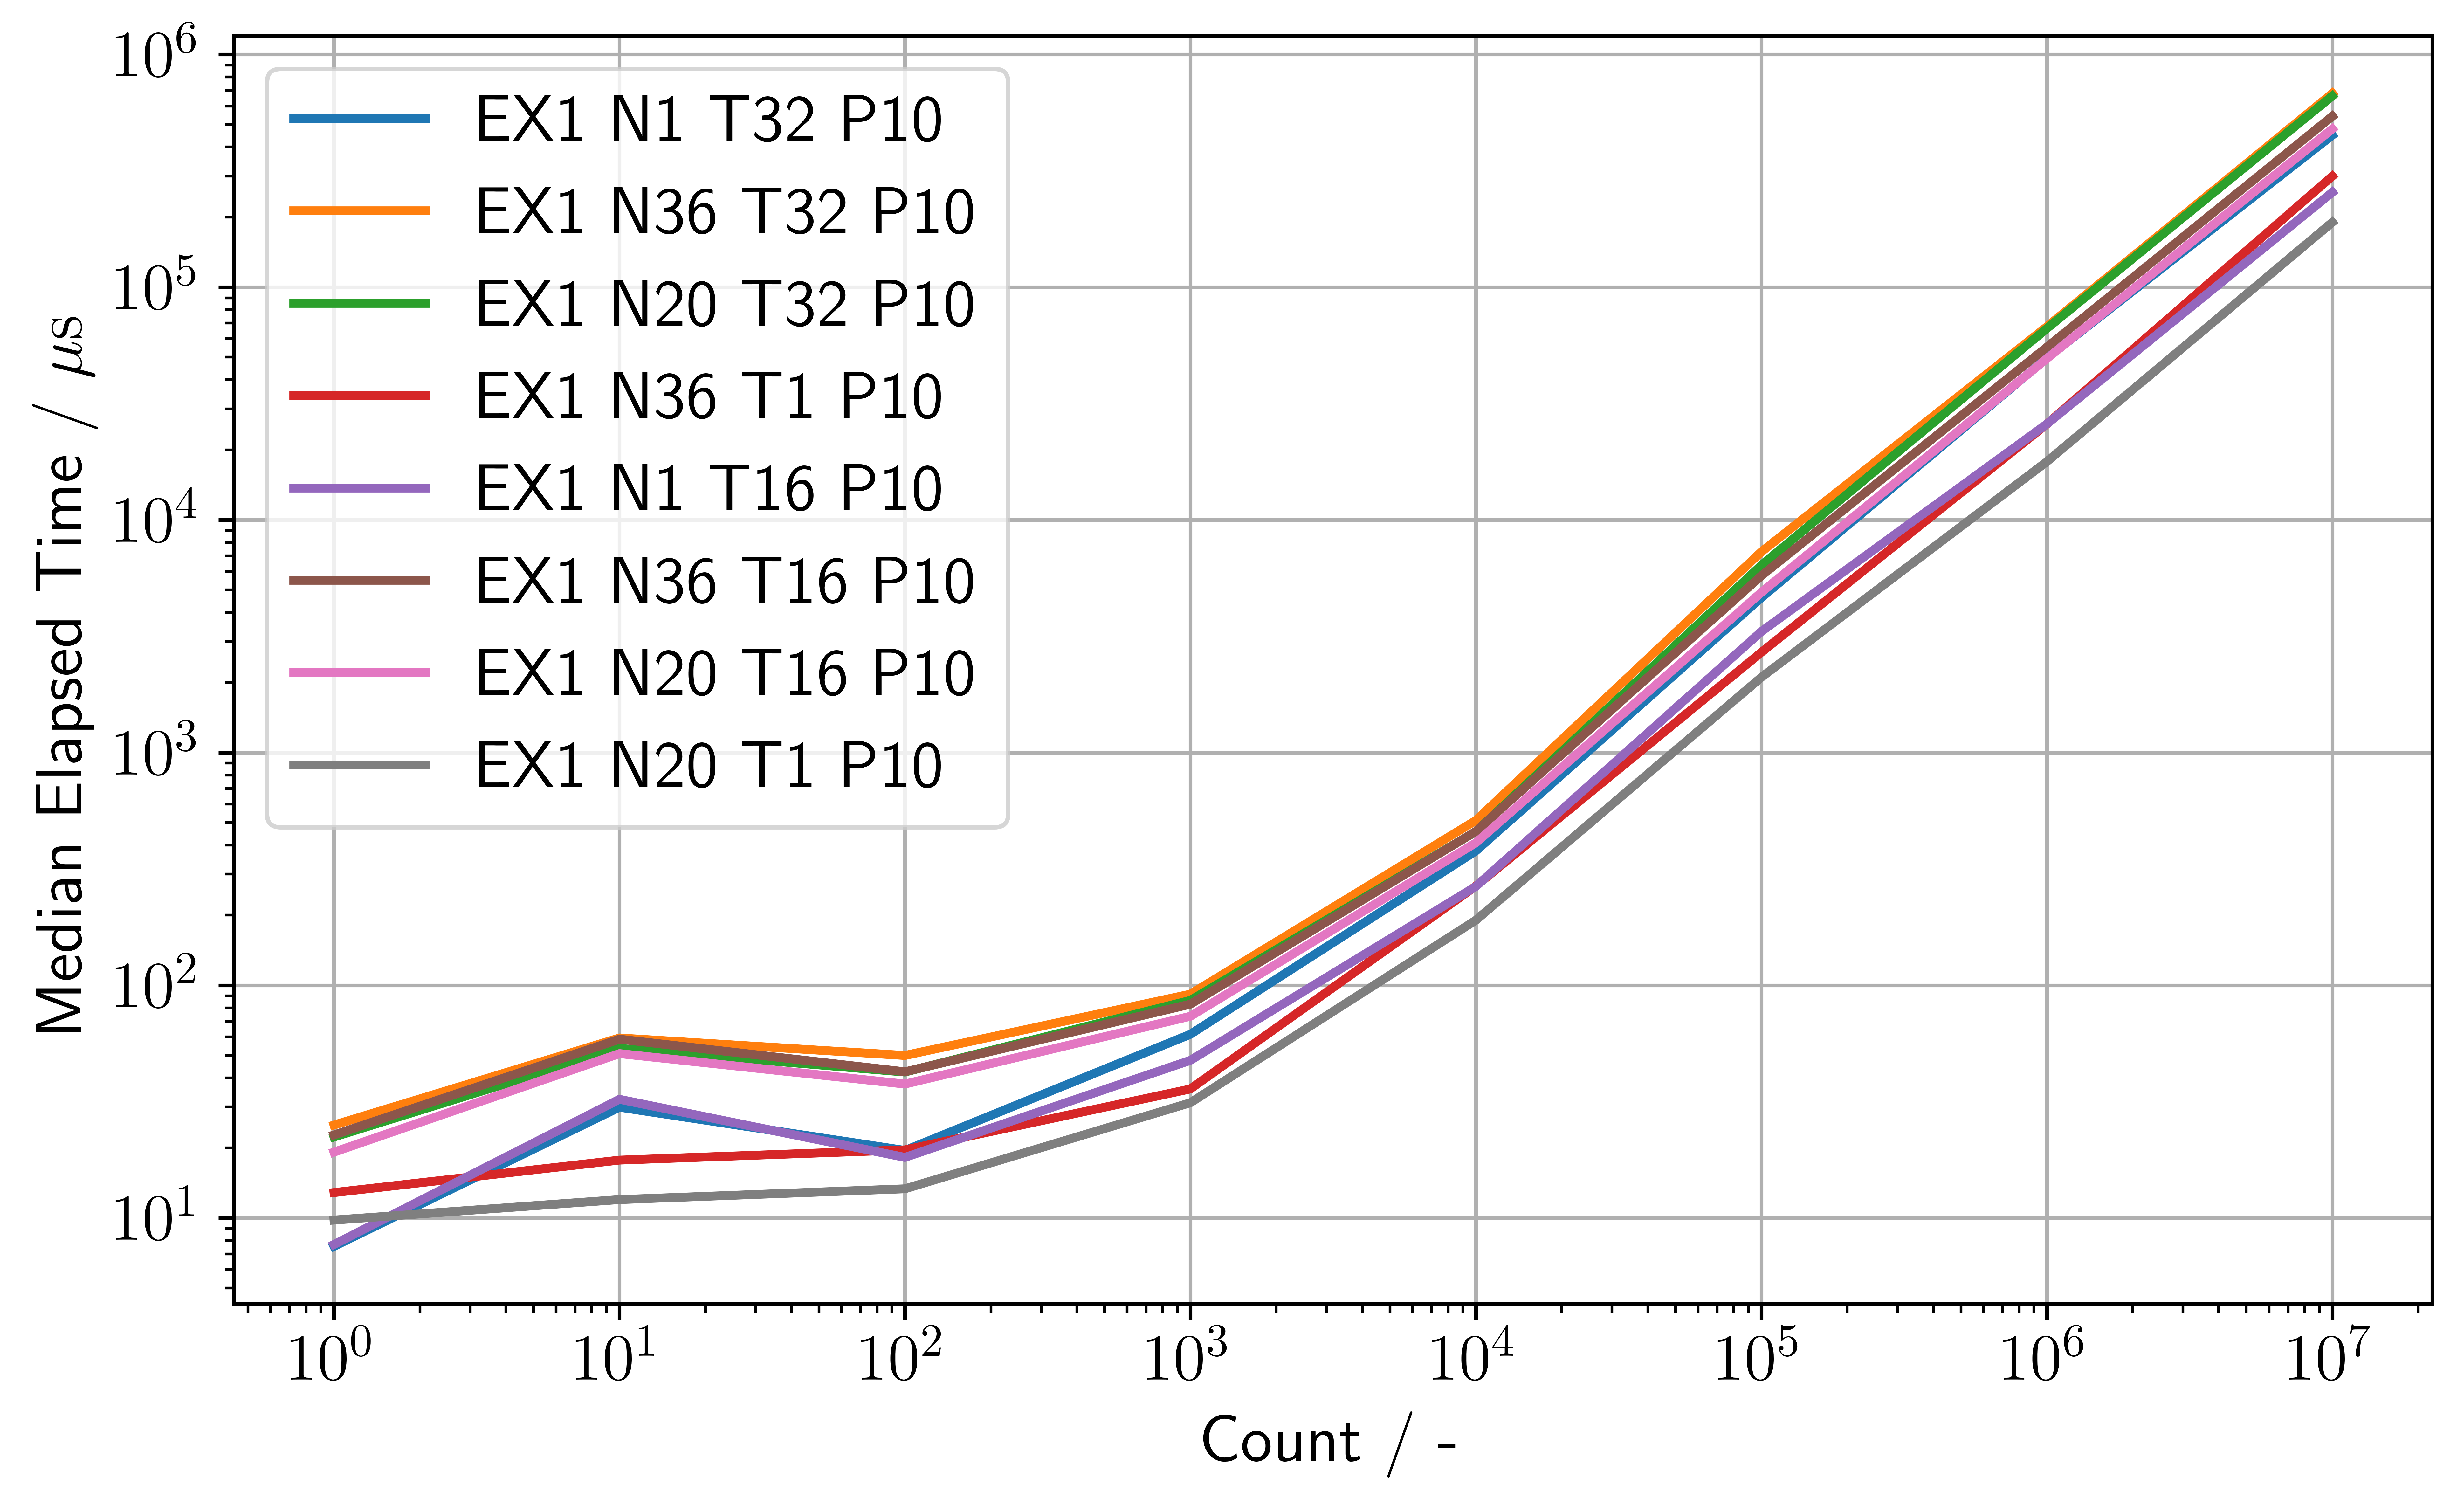

In [173]:
plot_x = 'Count'                # N1, N20, N36
plot_y = 'Median'               # T1, T16, T32
cond_1 = 'E'                  # P2, P10
cond_2 = 'P10'
cond_3 = 'P10'

plt.figure(1)
plt.grid()

for key in df_dict_1.keys():
    legend_entry = str(key)
    if cond_1 in key and cond_2 in key and cond_3 in key:
        plot_df = df_dict_1.get(key)
        plt.loglog(plot_df[plot_x], plot_df[plot_y], label=legend_dict_1[key], linewidth = 2)
    del legend_entry

plt.legend()
plt.xlabel( plot_x + ' / -')
plt.ylabel(plot_y +' Elapsed Time / $\mu \mathrm{s}$')
plt.tight_layout()

if(save_figures_to_latex==True):
    # plt.savefig(HPC_path + figures_path + '/Ex1_' + cond_1 + '_' + cond_2 + '.pdf')
    plt.savefig(HPC_path + figures_path + '/Ex1_' + '1' '.pdf')

del plot_x, plot_y, cond_1, cond_2, cond_3

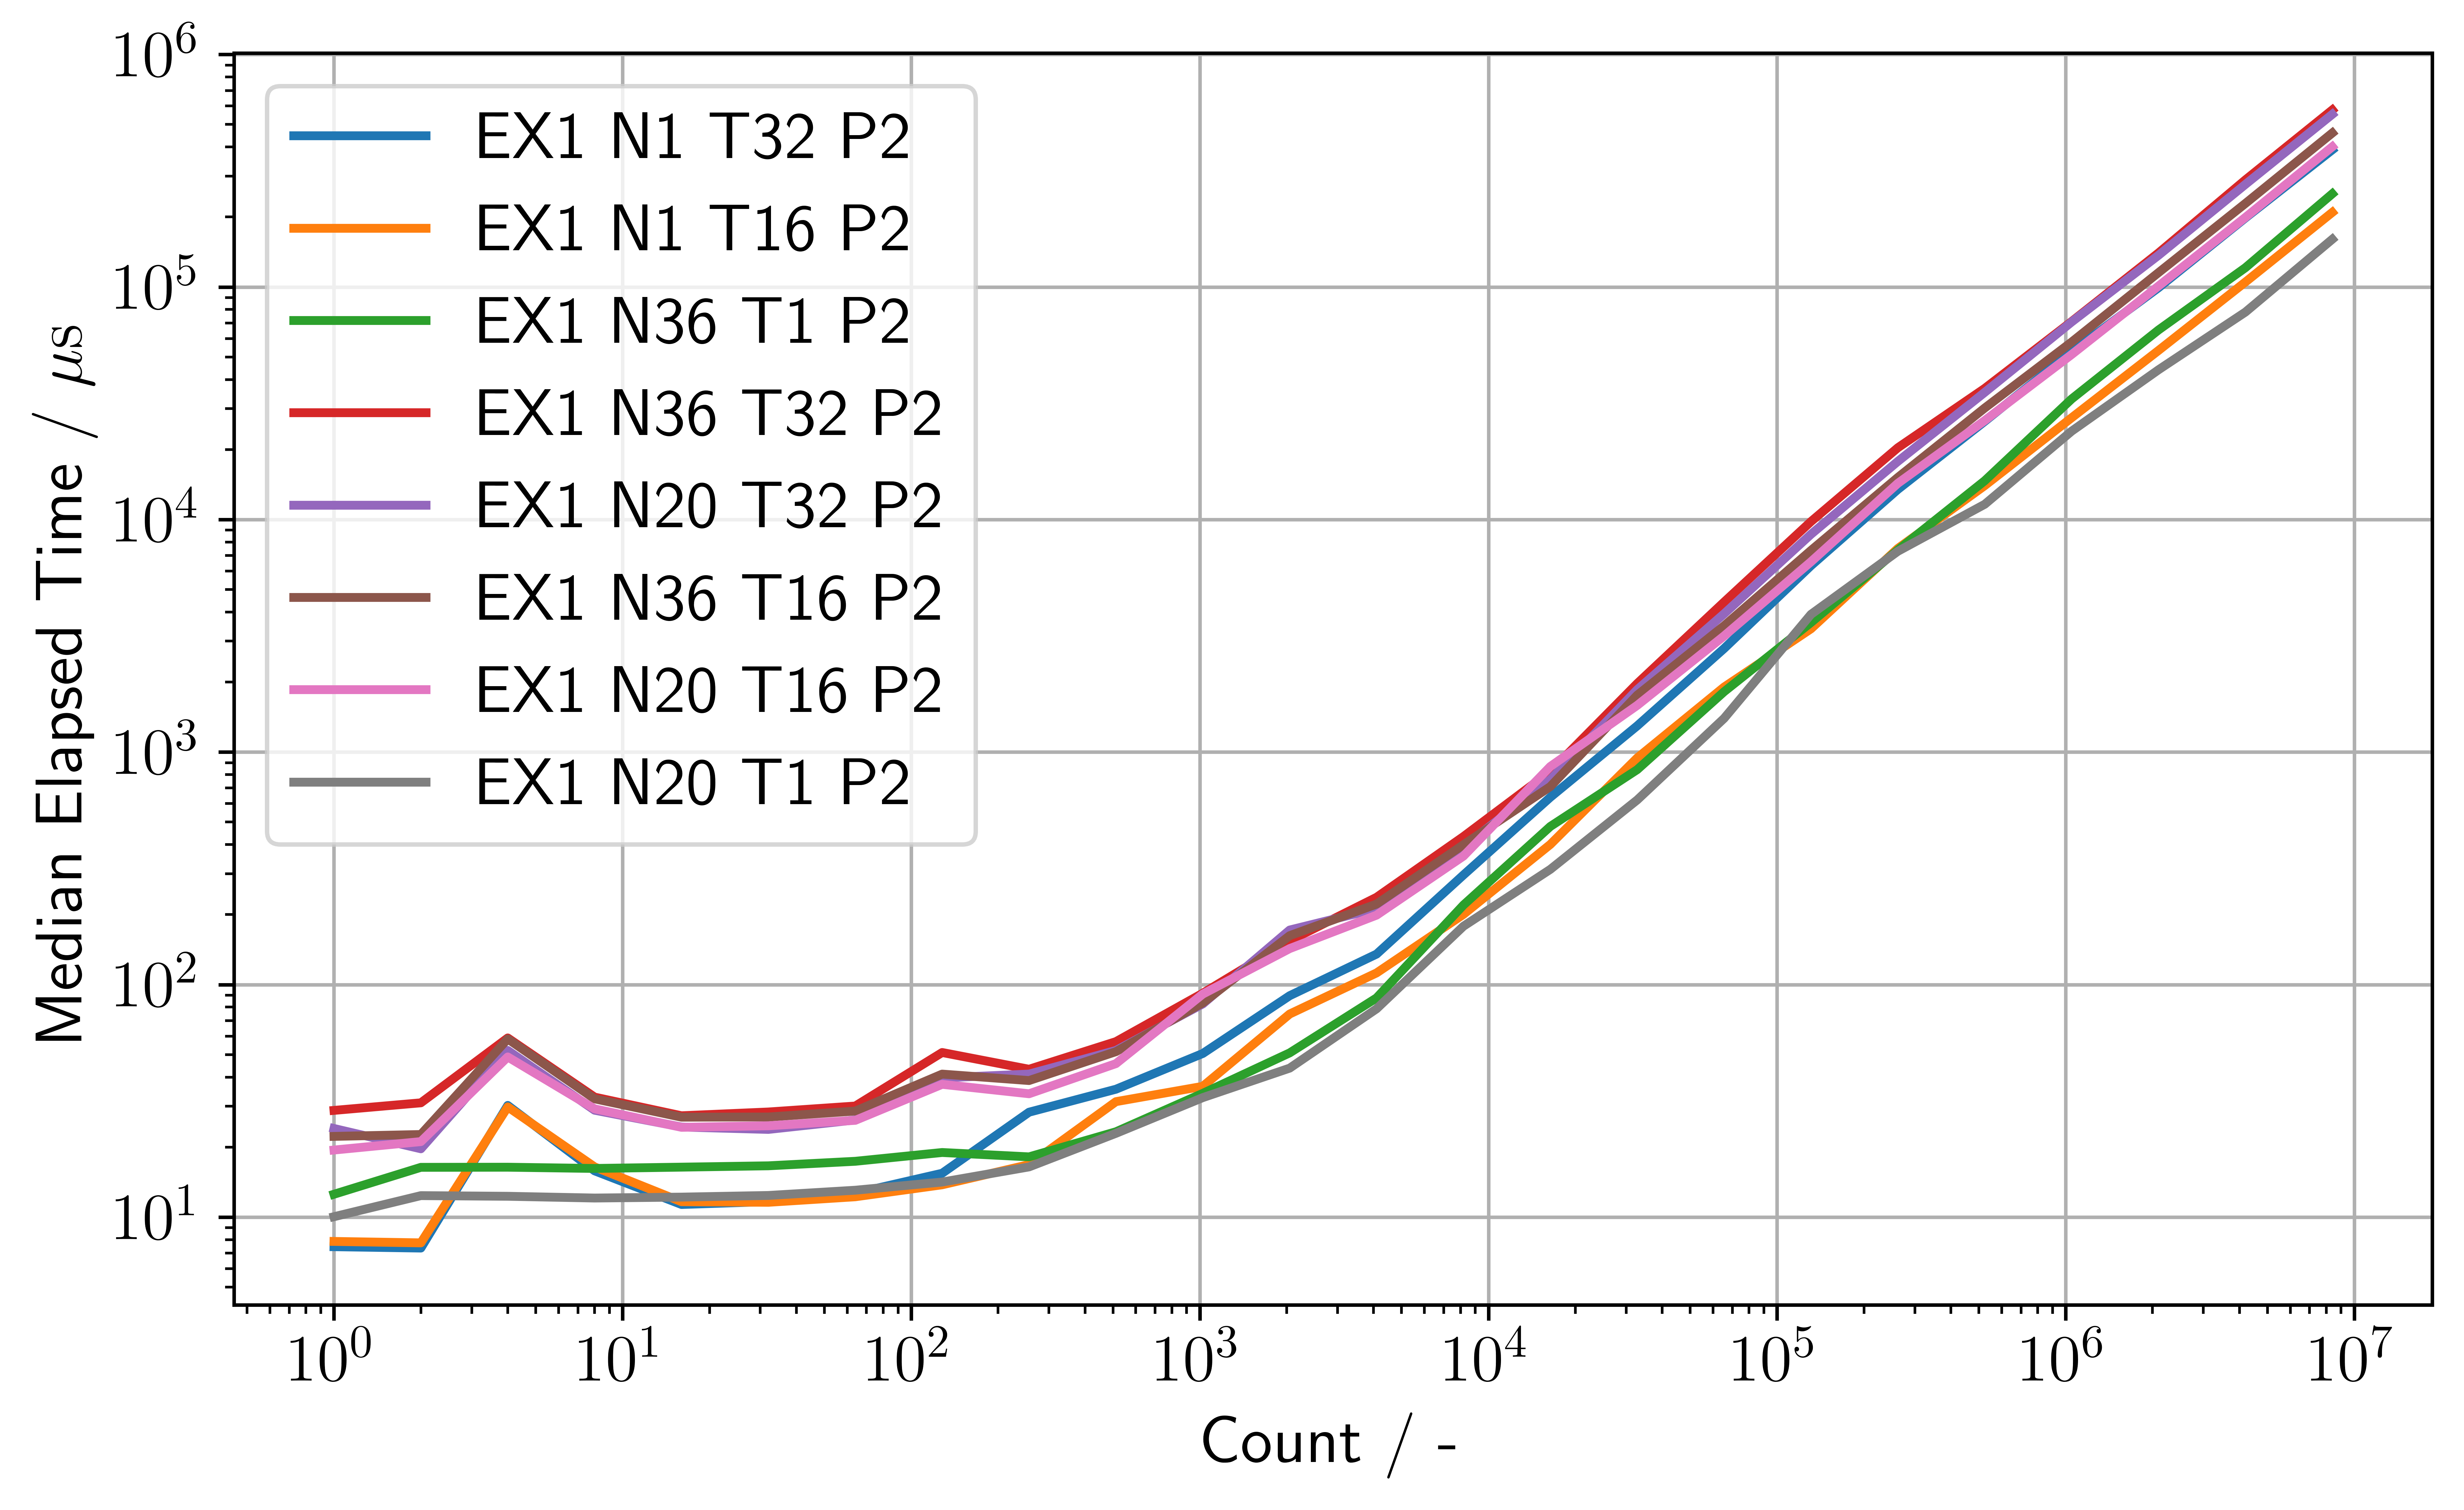

In [174]:
plot_x = 'Count'                # N1, N20, N36
plot_y = 'Median'               # T1, T16, T32
cond_1 = 'E'                  # P2, P10
cond_2 = 'P2'
cond_3 = 'P2'

plt.figure(1)
plt.grid()

for key in df_dict_1.keys():
    legend_entry = str(key)
    if cond_1 in key and cond_2 in key and cond_3 in key:
        plot_df = df_dict_1.get(key)
        plt.loglog(plot_df[plot_x], plot_df[plot_y], label=legend_dict_1[key], linewidth = 2)
    del legend_entry

plt.legend()
plt.xlabel( plot_x + ' / -')
plt.ylabel(plot_y +' Elapsed Time / $\mu \mathrm{s}$')
plt.tight_layout()

if(save_figures_to_latex==True):
    #plt.savefig(HPC_path + figures_path + '/Ex1_' + cond_1 + '_' + cond_2 + '.pdf')
    plt.savefig(HPC_path + figures_path + '/Ex1_' + '2' '.pdf')

del plot_x, plot_y, cond_1, cond_2, cond_3

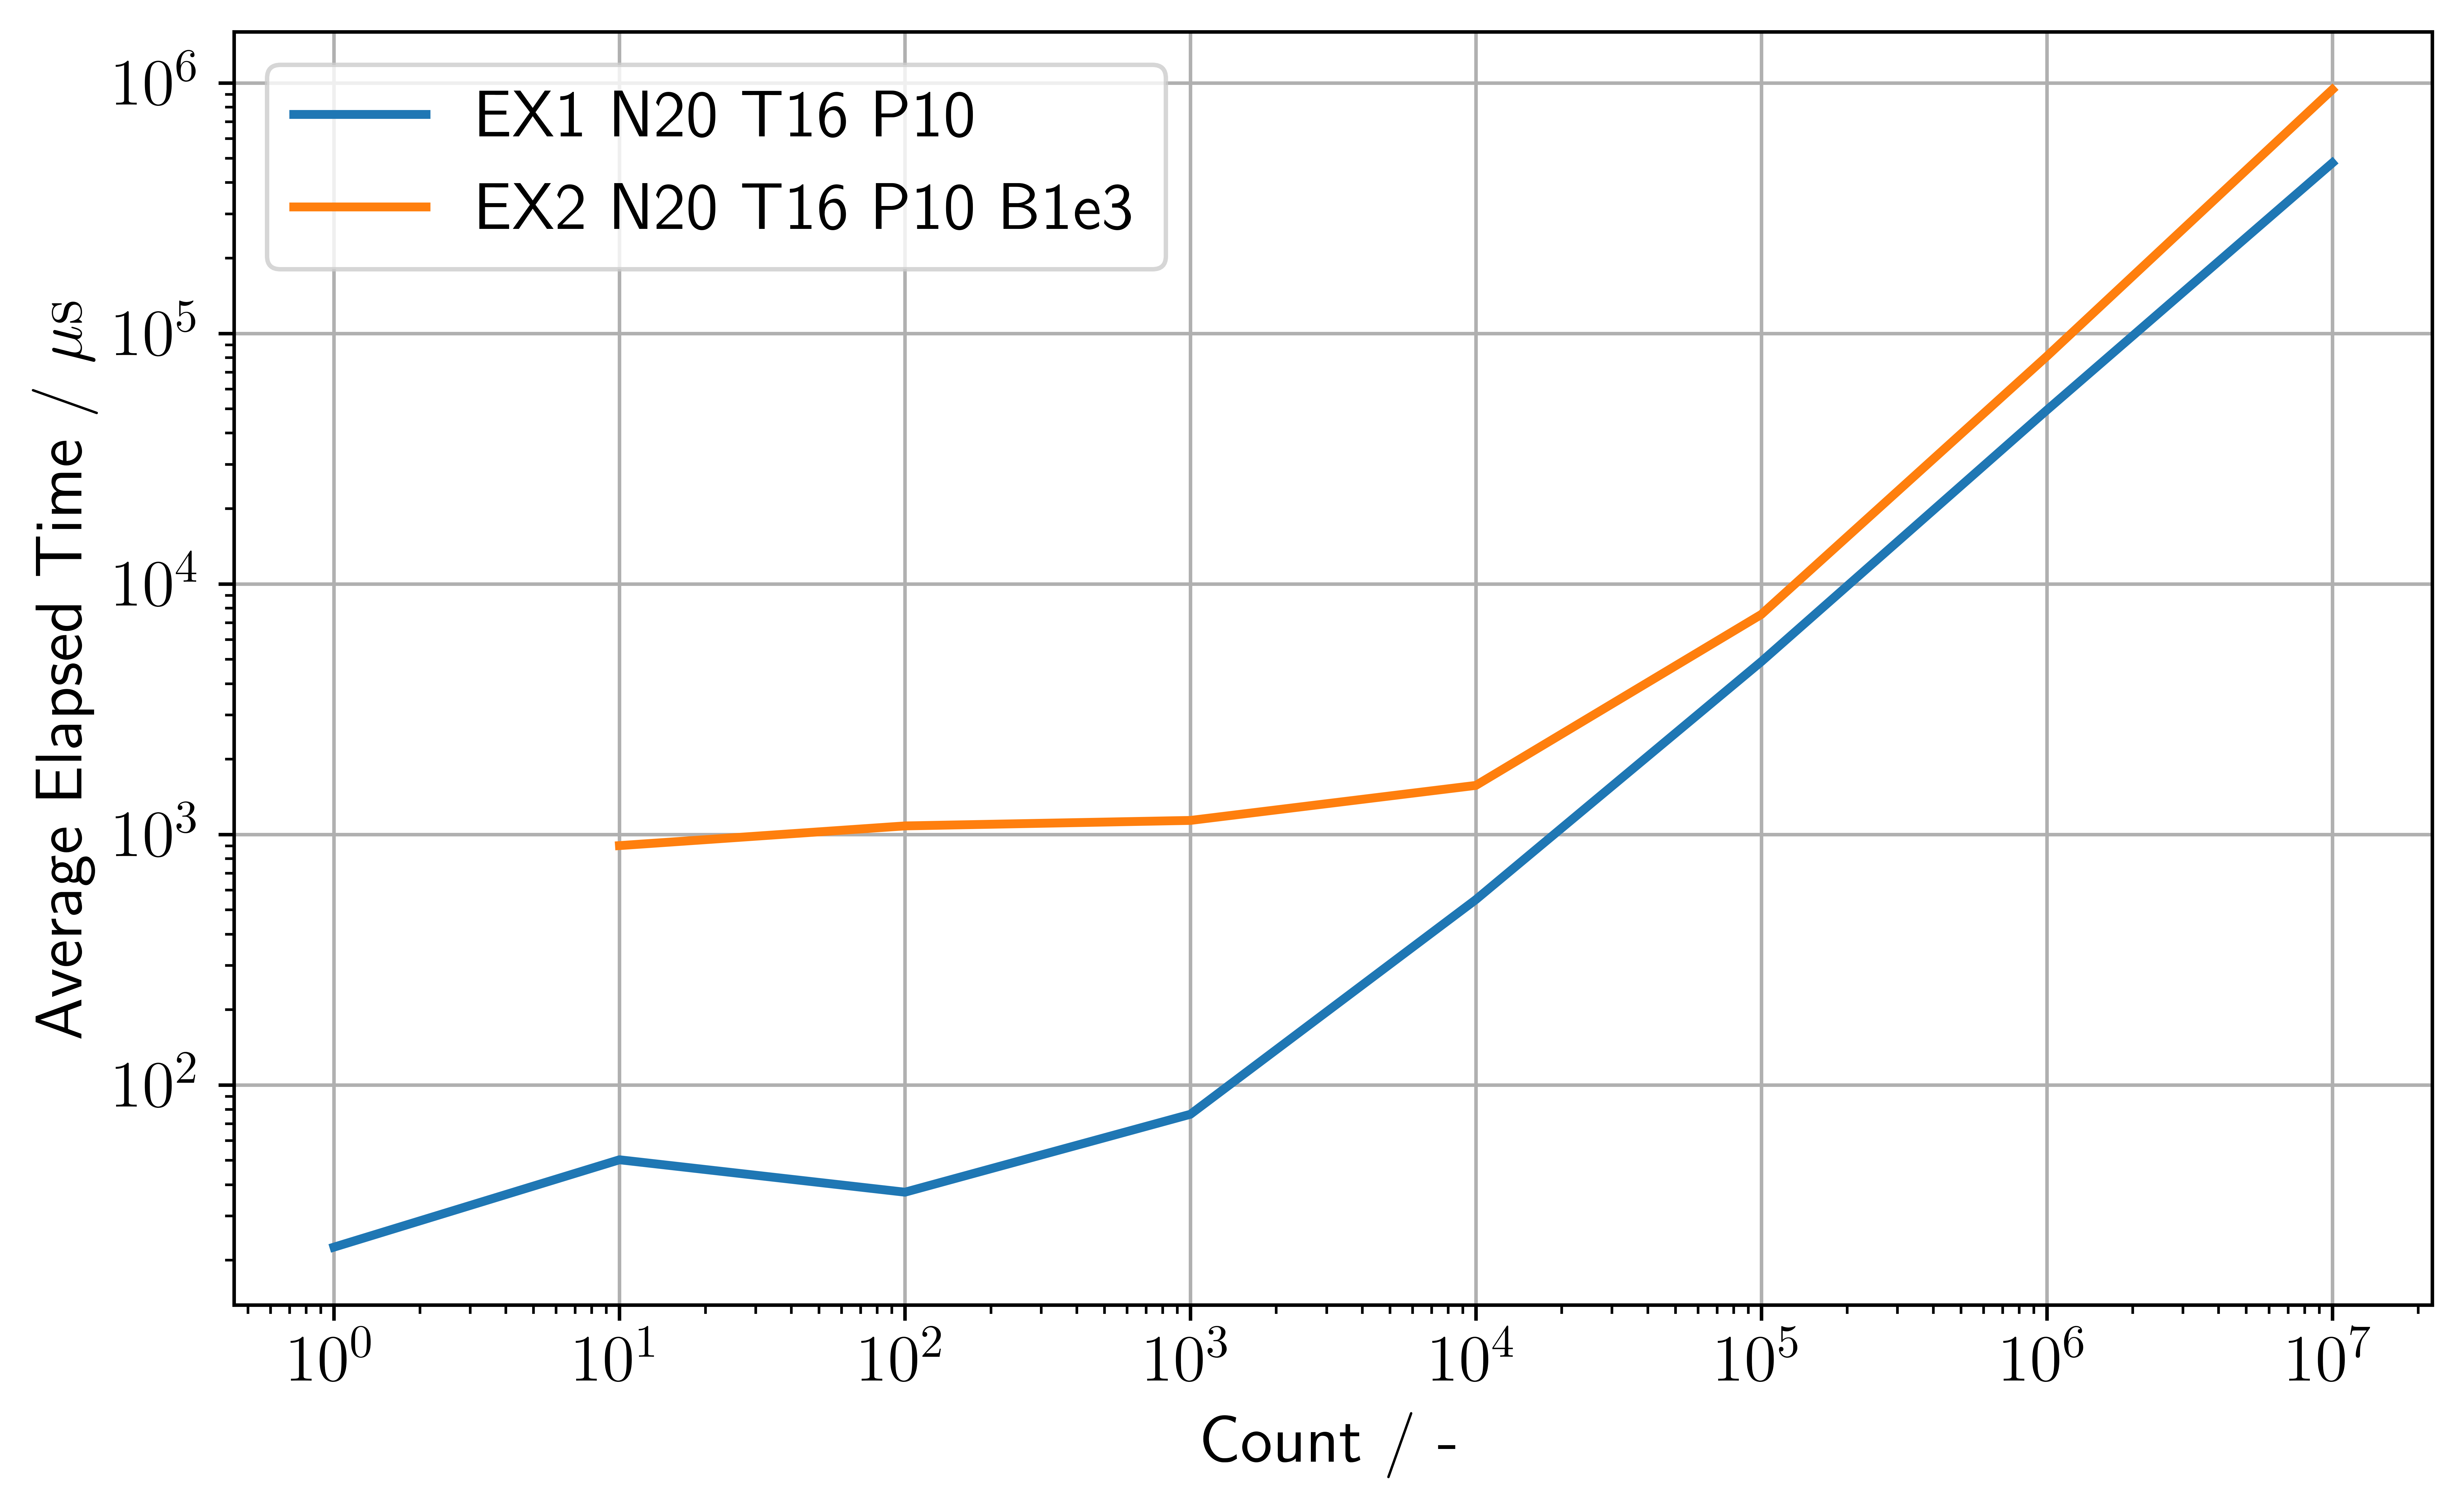

In [175]:
plot_x = 'Count'
plot_y = 'Average'
cond_1 = 'N20'
cond_2 = 'T16'
cond_3 = 'P10'

cond_4 = 'B1e3' # only applies to graphs of ex2 data


plt.figure(2)
plt.grid()

for key in df_dict_1.keys():
    if cond_1 in key and cond_2 in key and cond_3 in key:
        plot_df = df_dict_1.get(key)
        plt.loglog(plot_df[plot_x], plot_df[plot_y], label=legend_dict_1[key], linewidth = 2)

for key in df_dict_2.keys():
    if cond_1 in key and cond_2 in key and cond_3 in key and cond_4 in key:
        plot_df = df_dict_2.get(key)
        plt.loglog(plot_df[plot_x], plot_df[plot_y], label=legend_dict_2[key], linewidth = 2)

plt.legend()
plt.xlabel( plot_x + ' / -')
plt.ylabel(plot_y +' Elapsed Time / $\mu \mathrm{s}$')
plt.tight_layout()

if(save_figures_to_latex==True):
    # plt.savefig(HPC_path + figures_path + '/Ex1_' + cond_1 + '_' + cond_2 + '.pdf')
    plt.savefig(HPC_path + figures_path + '/Ex2_' + cond_1 + '_' + cond_2 + '.pdf')

del plot_x, plot_y, cond_1, cond_2, cond_3